# CDS-102: Lab 7 Workbook
## Name: 
### March 9, 2017

In [1]:
# Run this code block to load the Tidyverse package
.libPaths(new = "~/Rlibs")
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [2]:
# Import the dataset
original_data <- read_csv("Brauer2008_Dataset1.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  GID = col_character(),
  YORF = col_character(),
  NAME = col_character(),
  GWEIGHT = col_integer()
)
See spec(...) for full column specifications.


In [3]:
original_data

GID       YORF      
1    GENE1331X A_06_P5820
2    GENE4924X A_06_P5866
3    GENE4690X A_06_P1834
4    GENE1177X A_06_P4928
5    GENE511X  A_06_P5620
6    GENE2133X A_06_P5307
7    GENE1002X A_06_P6258
8    GENE5478X A_06_P7082
9    GENE2065X A_06_P2554
10   GENE2440X A_06_P6431
11   GENE4180X A_06_P6220
12   GENE5247X A_06_P1410
13   GENE2121X A_06_P2983
14   GENE1985X A_06_P3720
15   GENE4728X A_06_P2774
16   GENE3153X A_06_P4597
17   GENE3704X A_06_P5667
18   GENE2141X A_06_P3260
19   GENE2978X A_06_P3607
20   GENE1203X A_06_P5929
21   GENE3214X A_06_P6219
22   GENE443X  A_06_P1322
23   GENE1570X A_06_P6449
24   GENE4434X A_06_P2356
25   GENE2486X A_06_P6921
26   GENE2099X A_06_P1729
27   GENE5137X A_06_P2688
28   GENE2691X A_06_P1007
29   GENE2673X A_06_P1933
30   GENE3094X A_06_P1548
⋮    ⋮         ⋮         
5508 GENE5335X A_06_P5817
5509 GENE3931X A_06_P4860
5510 GENE2273X A_06_P3220
5511 GENE1180X A_06_P6178
5512 GENE4771X A_06_P2485
5513 GENE321X  A_06_P7110
5514 GENE236X  A_06_P6294
5515 GENE2516X A_06_P2042
5516 GENE1687X A_06_P4130
5517 GENE5522X A_06_P4129
5518 GENE2461X A_06_P1902
5519 GENE5154X A_06_P3834
5520 GENE2896X A_06_P5553
5521 GENE4037X A_06_P4180
5522 GENE674X  A_06_P7057
5523 GENE3957X A_06_P6469
5524 GENE2250X A_06_P7164
5525 GENE785X  A_06_P7198
5526 GENE4483X A_06_P1283
5527 GENE491X  A_06_P3540
5528 GENE4050X A_06_P2650
5529 GENE17X   A_06_P6055
5530 GENE4426X A_06_P6690
5531 GENE1274X A_06_P6825
5532 GENE410X  A_06_P4625
5533 GENE2833X A_06_P6094
5534 GENE271X  A_06_P3243
5535 GENE1691X A_06_P4196
5536 GENE1755X A_06_P4680
5537 GENE4255X A_06_P6304
     NAME                                                                                                                                                       
1    SFB2       || ER to Golgi transport || molecular function unknown || YNL049C || 1082129                                                                    
2    || biological process unknown || molecular function unknown || YNL095C || 1086222                                                                          
3    QRI7       || proteolysis and peptidolysis || metalloendopeptidase activity || YDL104C || 1085955                                                          
4    CFT2       || mRNA polyadenylylation* || RNA binding || YLR115W || 1081958                                                                                 
5    SSO2       || vesicle fusion* || t-SNARE activity || YMR183C || 1081214                                                                                    
6    PSP2       || biological process unknown || molecular function unknown || YML017W || 1083036                                                               
7    RIB2       || riboflavin biosynthesis || pseudouridylate synthase activity* || YOL066C || 1081766                                                          
8    VMA13      || vacuolar acidification || hydrogen-transporting ATPase activity, rotational mechanism || YPR036W || 1086860                                  
9    EDC3       || deadenylylation-independent decapping || molecular function unknown || YEL015W || 1082963                                                    
10   VPS5       || protein retention in Golgi* || protein transporter activity || YOR069W || 1083389                                                            
11   || biological process unknown || molecular function unknown || YOL029C || 1085380                                                                          
12   AMN1       || negative regulation of exit from mitosis* || protein binding || YBR158W || 1086594                                                           
13   SCW11      || cytokinesis, completion of separation || glucan 1,3-beta-glucosidase activity || YGL028C || 1083024                                          
14   DSE2       || cell wall organization and biogenesis* || glucan 1,3-beta-glucosidase activity || YHR143W || 1082870                    

In [17]:
cleaning_data_step1 <- separate(original_data, NAME, c("name", "BP", "MF", "systematic_name",  "number"), sep = "\\|\\|")

In [18]:
cleaning_data_step2 <- mutate_each(cleaning_data_step1, funs(trimws), name:systematic_name)

In [19]:
cleaning_data_step3 <- select(cleaning_data_step2, -number, -GID, -YORF, -GWEIGHT)

In [20]:
cleaning_data_step4 <- gather(cleaning_data_step3, sample, expression, G0.05:U0.3)

In [23]:
cleaning_data_step5 <- separate(cleaning_data_step4, sample, c("nutrient", "rate"), sep =1, convert = TRUE)

In [24]:
glimpse(cleaning_data_step5)

Observations: 199,332
Variables: 7
$ name            <chr> "SFB2", "", "QRI7", "CFT2", "SSO2", "PSP2", "RIB2",...
$ BP              <chr> "ER to Golgi transport", "biological process unknow...
$ MF              <chr> "molecular function unknown", "molecular function u...
$ systematic_name <chr> "YNL049C", "YNL095C", "YDL104C", "YLR115W", "YMR183...
$ nutrient        <chr> "G", "G", "G", "G", "G", "G", "G", "G", "G", "G", "...
$ rate            <dbl> 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.0...
$ expression      <dbl> -0.24, 0.28, -0.02, -0.33, 0.05, -0.69, -0.55, -0.7...


In [32]:
data.filtered <- filter(cleaning_data_step5, name == "LEU1")
print(data.filtered)

# A tibble: 36 × 7
    name                   BP                                     MF
   <chr>                <chr>                                  <chr>
1   LEU1 leucine biosynthesis 3-isopropylmalate dehydratase activity
2   LEU1 leucine biosynthesis 3-isopropylmalate dehydratase activity
3   LEU1 leucine biosynthesis 3-isopropylmalate dehydratase activity
4   LEU1 leucine biosynthesis 3-isopropylmalate dehydratase activity
5   LEU1 leucine biosynthesis 3-isopropylmalate dehydratase activity
6   LEU1 leucine biosynthesis 3-isopropylmalate dehydratase activity
7   LEU1 leucine biosynthesis 3-isopropylmalate dehydratase activity
8   LEU1 leucine biosynthesis 3-isopropylmalate dehydratase activity
9   LEU1 leucine biosynthesis 3-isopropylmalate dehydratase activity
10  LEU1 leucine biosynthesis 3-isopropylmalate dehydratase activity
# ... with 26 more rows, and 4 more variables: systematic_name <chr>,
#   nutrient <chr>, rate <dbl>, expression <dbl>


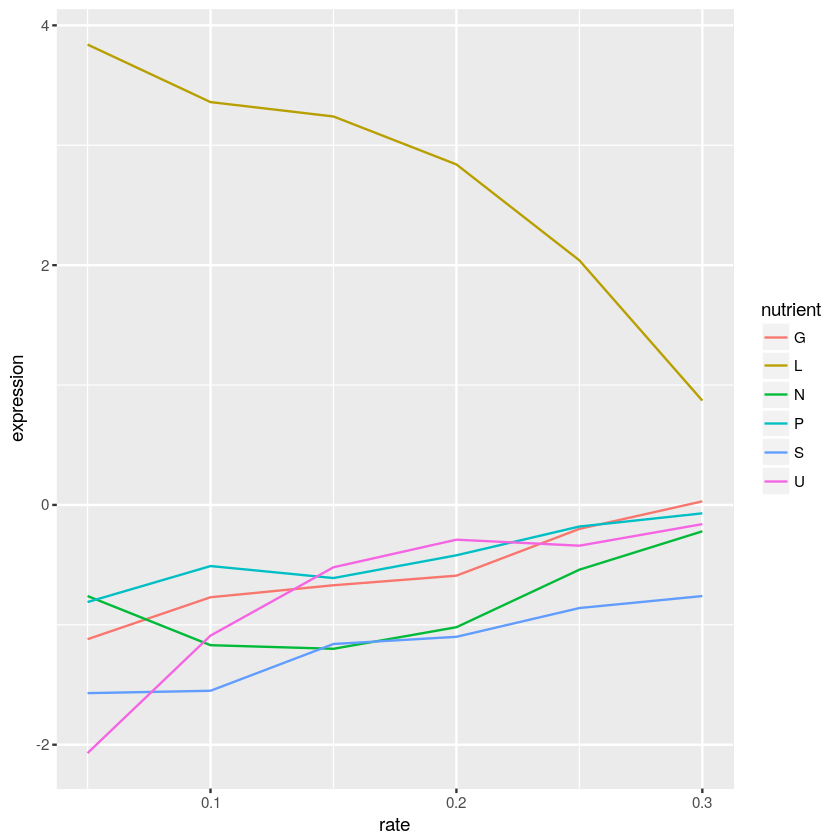

In [33]:
ggplot(data = data.filtered) + geom_line(mapping = aes(x = rate, y = expression, color = nutrient))